/var/folders/w0/f40yh3451y57_mt9g9mx5jmh0000gn/T/ipykernel_20302/3779278407.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


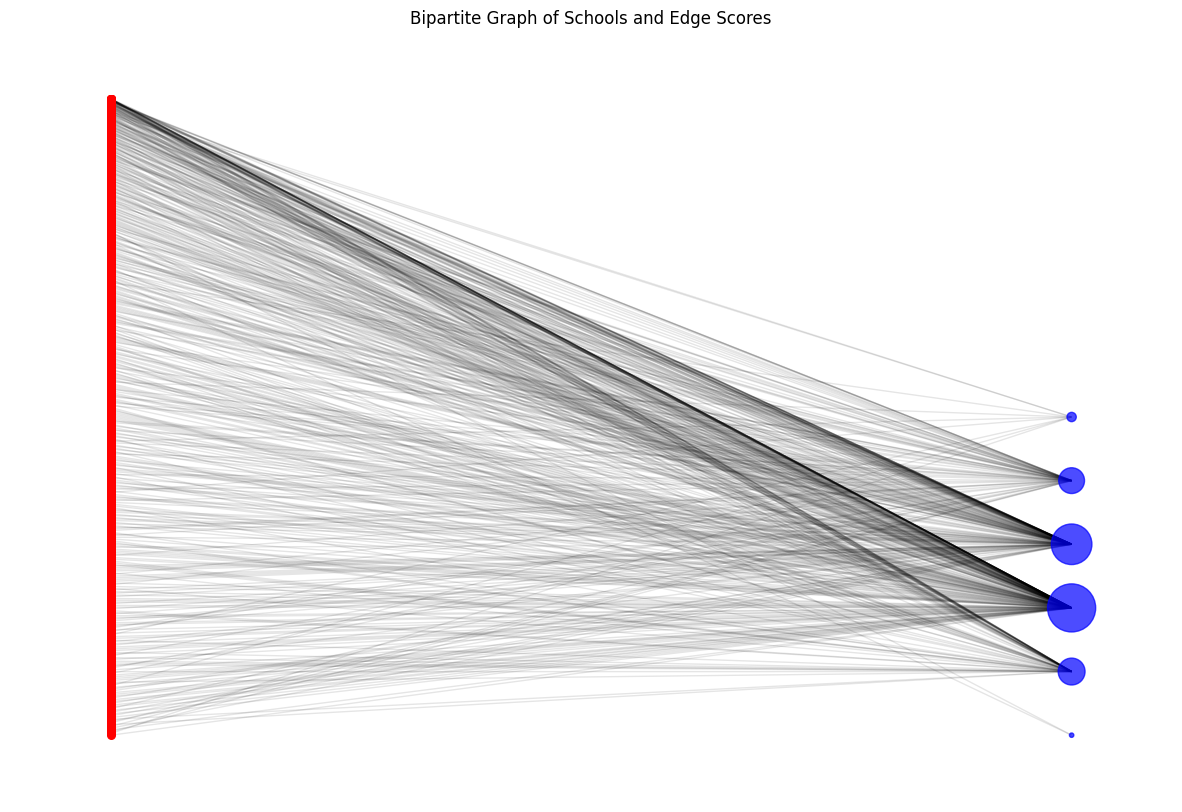

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Load your data
file_path = 'Chicago_Public_Schools_-_Progress_Report_Cards__2011-2012__20240416.csv'
df = pd.read_csv(file_path)

# Create a bipartite graph
B = nx.Graph()

# Add nodes and edges
for index, row in df.iterrows():
    B.add_node(row['Name of School'], bipartite=0, color='red')
    B.add_node(row['Edge Score'], bipartite=1, color='blue')
    B.add_edge(row['Name of School'], row['Edge Score'])

# Position nodes
pos = {}
schools = set(df['Name of School'])
edge_scores = set(df['Edge Score'])

# Sort schools and edge scores to keep consistent order
sorted_schools = sorted(schools)
sorted_edge_scores = sorted(edge_scores)

# Enhance vertical scale for visual distinction
vertical_scale = 100  # Increasing vertical scale
# Increase spacing between school nodes
school_y_positions = [2 * vertical_scale * np.sin(i / (len(sorted_schools) / 3.141592653589793 * 2)) for i in range(len(sorted_schools))]

#school_y_positions = [vertical_scale * np.sin(i / (len(sorted_schools) / 3.141592653589793 * 2)) for i in range(len(sorted_schools))]
edge_score_y_positions = np.linspace(0, 100, len(edge_scores))

# Place schools at x=0 using the sinusoidal pattern
pos.update((node, (0, y)) for node, y in zip(sorted_schools, school_y_positions))
# Place edge scores at x=1 with normal spacing
pos.update((node, (1, y)) for node, y in zip(sorted_edge_scores, edge_score_y_positions))

# Setting up the plot size to make it larger
plt.figure(figsize=(15, 10))  # Adjust figure size

# Drawing the graph
nx.draw_networkx_nodes(B, pos, nodelist=schools, node_color='red', node_size=30)  # Smaller node size
nx.draw_networkx_nodes(B, pos, nodelist=edge_scores, node_color='blue', node_size=[B.degree(n) * 5 for n in edge_scores], alpha=0.7)

# Draw edges with reduced opacity for better visibility
nx.draw_networkx_edges(B, pos, alpha=0.1)

plt.title('Bipartite Graph of Schools and Edge Scores')
plt.axis('off')  # Turn off the axis
plt.show()


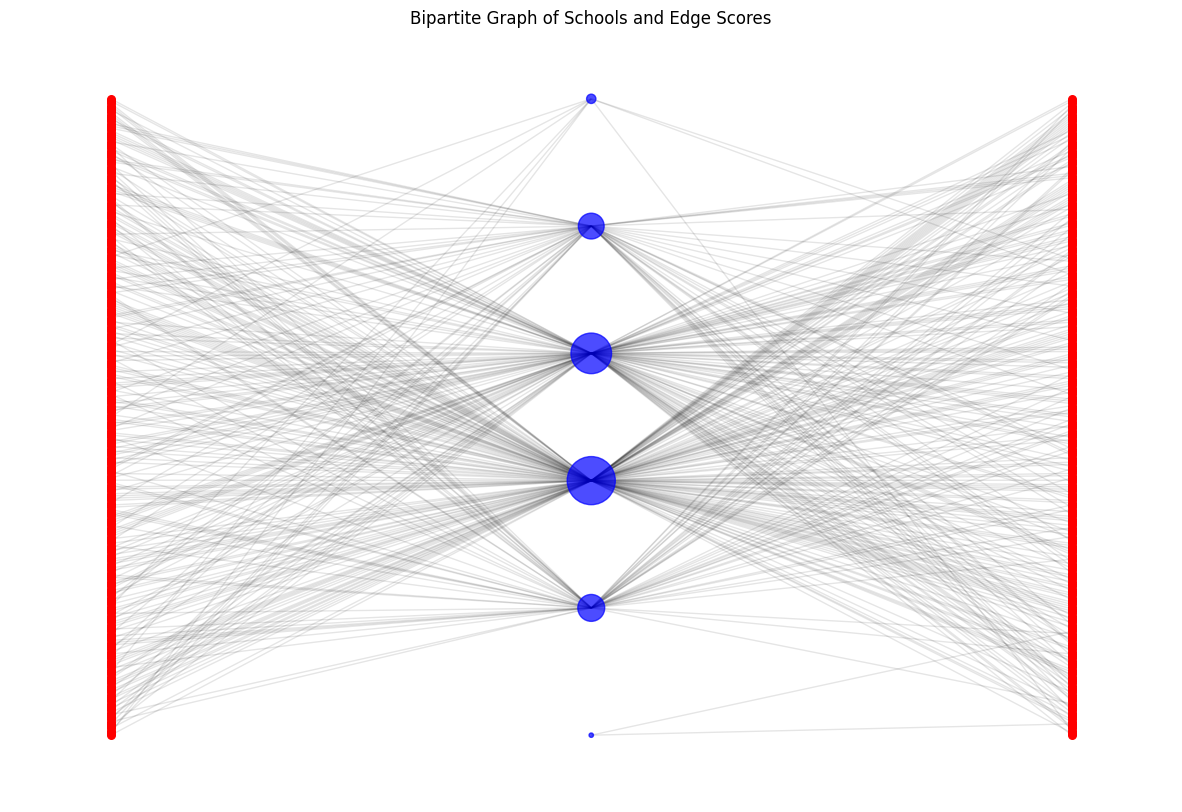

In [28]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Load your data
file_path = 'Chicago_Public_Schools_-_Progress_Report_Cards__2011-2012__20240416.csv'
df = pd.read_csv(file_path)

# Create a bipartite graph
B = nx.Graph()

# Add nodes and edges
for index, row in df.iterrows():
    B.add_node(row['Name of School'], bipartite=0, color='red')
    B.add_node(row['Edge Score'], bipartite=1, color='blue')
    B.add_edge(row['Name of School'], row['Edge Score'])

# Position nodes
pos = {}
schools = set(df['Name of School'])
edge_scores = set(df['Edge Score'])

# Sort schools and edge scores to keep consistent order
sorted_schools = sorted(schools)
sorted_edge_scores = sorted(edge_scores)

# Split schools into two groups for left and right placement
half_size = len(sorted_schools) // 2
left_schools = sorted_schools[:half_size]
right_schools = sorted_schools[half_size:]

# Calculate spacing
left_y_positions = np.linspace(0, 100, len(left_schools))
right_y_positions = np.linspace(0, 100, len(right_schools))
edge_score_y_positions = np.linspace(0, 100, len(edge_scores))

# Place left schools at x=-1 and right schools at x=1
pos.update((node, (-1, y)) for node, y in zip(left_schools, left_y_positions))
pos.update((node, (1, y)) for node, y in zip(right_schools, right_y_positions))
# Place edge scores at x=0
pos.update((node, (0, y)) for node, y in zip(sorted_edge_scores, edge_score_y_positions))

# Setting up the plot size to make it larger
plt.figure(figsize=(15, 10))

# Drawing the graph
nx.draw_networkx_nodes(B, pos, nodelist=left_schools + right_schools, node_color='red', node_size=30)
nx.draw_networkx_nodes(B, pos, nodelist=edge_scores, node_color='blue', node_size=[B.degree(n) * 5 for n in edge_scores], alpha=0.7)

# Draw edges with reduced opacity for better visibility
nx.draw_networkx_edges(B, pos, alpha=0.1)

plt.title('Bipartite Graph of Schools and Edge Scores')
plt.axis('off')  # Turn off the axis
plt.show()


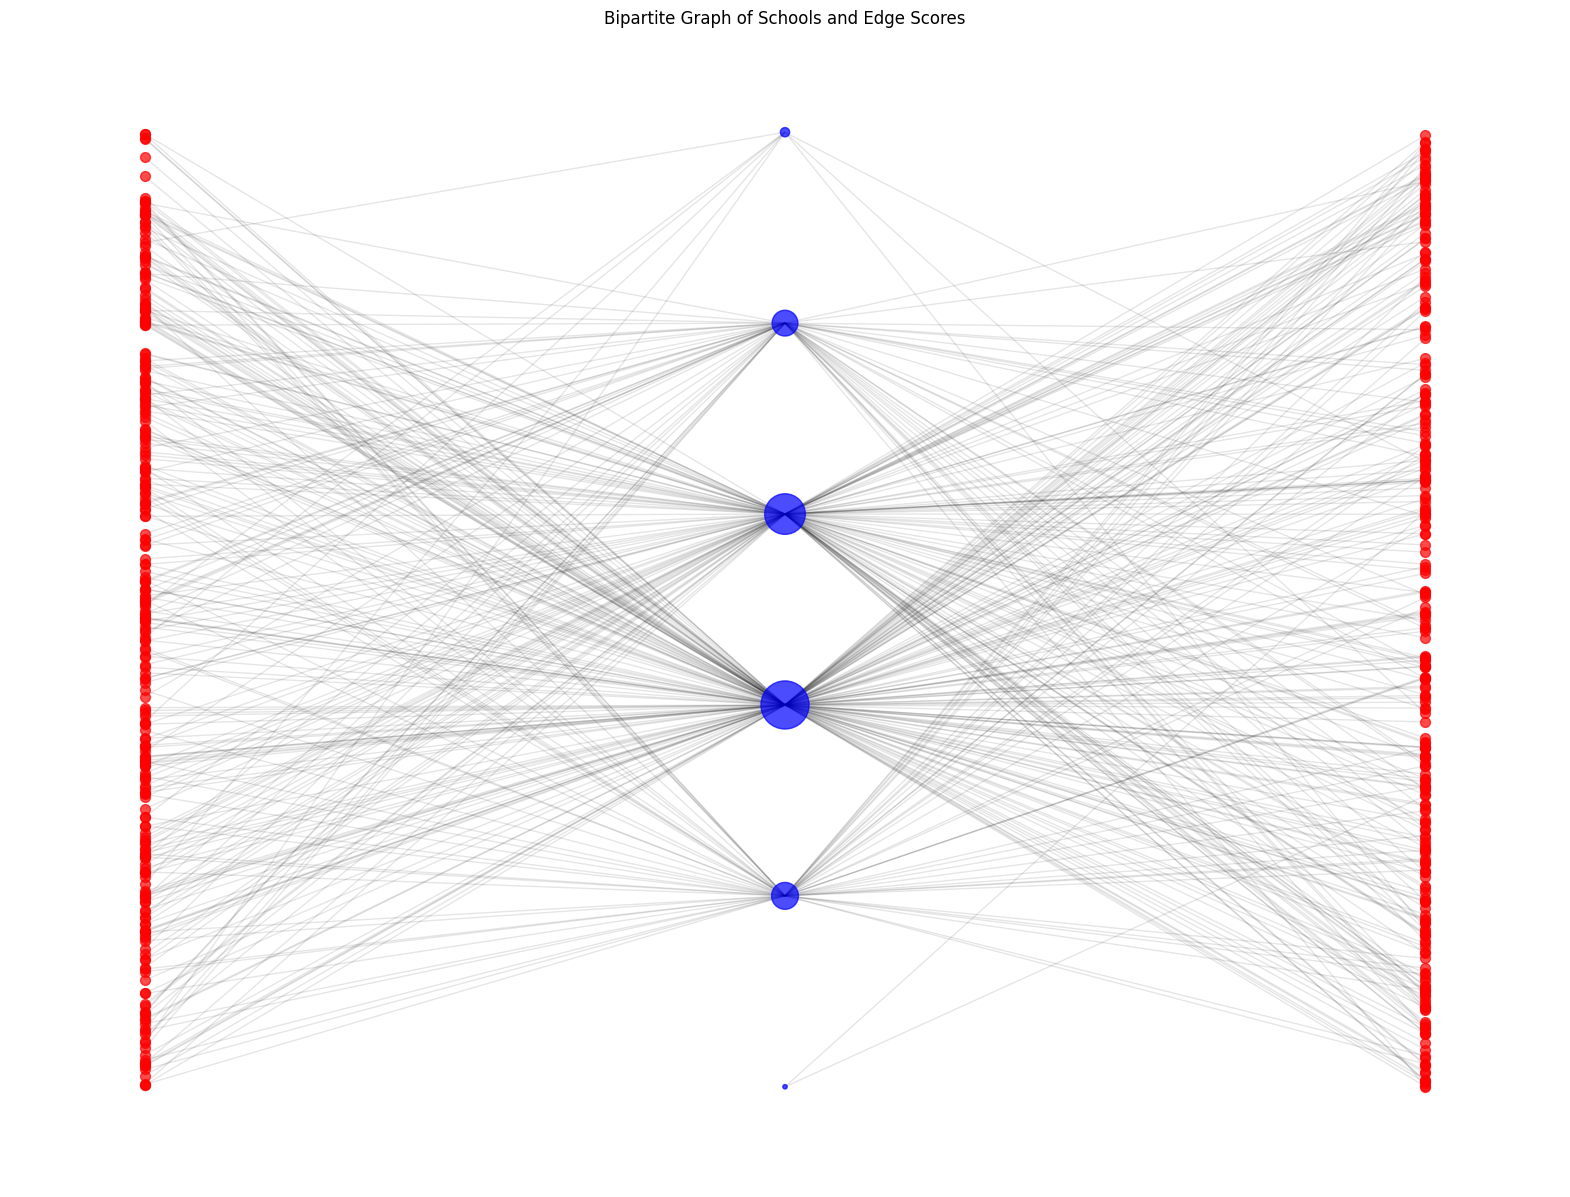

In [31]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

# Load your data
file_path = 'Chicago_Public_Schools_-_Progress_Report_Cards__2011-2012__20240416.csv'
df = pd.read_csv(file_path)

# Create a bipartite graph
B = nx.Graph()

# Add nodes and edges
for index, row in df.iterrows():
    B.add_node(row['Name of School'], bipartite=0, color='red')
    B.add_node(row['Edge Score'], bipartite=1, color='blue')
    B.add_edge(row['Name of School'], row['Edge Score'])

# Position nodes
pos = {}
schools = set(df['Name of School'])
edge_scores = set(df['Edge Score'])

# Sort schools and edge scores to keep consistent order
sorted_schools = sorted(schools)
sorted_edge_scores = sorted(edge_scores)

# More dynamic placement of schools
left_schools = sorted_schools[:len(sorted_schools)//2]
right_schools = sorted_schools[len(sorted_schools)//2:]

# Randomize school positions within a range to prevent vertical alignment
left_y_positions = [random.uniform(0, 200) for _ in left_schools]
right_y_positions = [random.uniform(0, 200) for _ in right_schools]
edge_score_y_positions = np.linspace(0, 200, len(edge_scores))

# Place schools on the left and right, edge scores in the middle
pos.update((node, (-1, y)) for node, y in zip(left_schools, left_y_positions))
pos.update((node, (1, y)) for node, y in zip(right_schools, right_y_positions))
pos.update((node, (0, y)) for node, y in zip(sorted_edge_scores, edge_score_y_positions))

# Setting up the plot size to make it larger and allow for better node visibility
plt.figure(figsize=(20, 15))  # Increase figure size for better visibility

# Drawing the graph
nx.draw_networkx_nodes(B, pos, nodelist=left_schools + right_schools, node_color='red', node_size=50, alpha= 0.7)
nx.draw_networkx_nodes(B, pos, nodelist=edge_scores, node_color='blue', node_size=[B.degree(n) * 5 for n in edge_scores], alpha=0.7)
nx.draw_networkx_edges(B, pos, alpha=0.1)

plt.title('Bipartite Graph of Schools and Edge Scores')
plt.axis('off')  # Turn off the axis
plt.show()


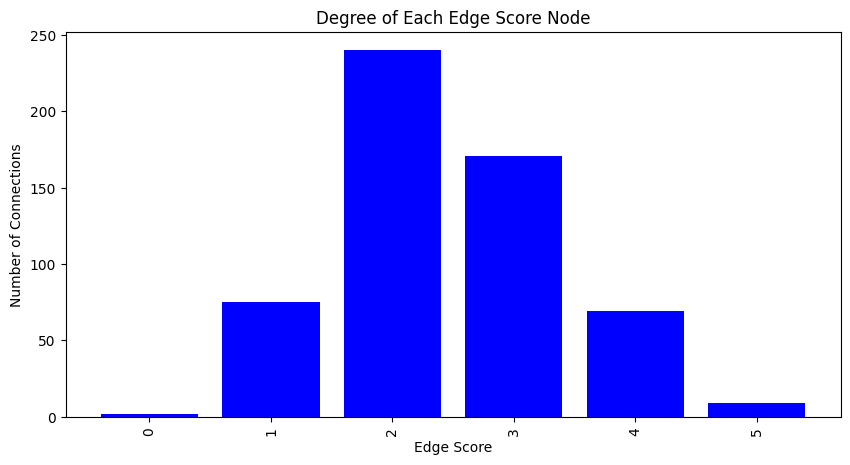

In [32]:
import matplotlib.pyplot as plt

# Calculate degrees of edge score nodes
edge_score_degrees = {node: val for node, val in B.degree() if node in edge_scores}

# Plotting the degrees of edge score nodes
degrees = list(edge_score_degrees.values())
plt.figure(figsize=(10, 5))
plt.bar(edge_score_degrees.keys(), degrees, color='blue')
plt.xlabel('Edge Score')
plt.ylabel('Number of Connections')
plt.title('Degree of Each Edge Score Node')
plt.xticks(rotation=90)
plt.show()


{0: 6.14495959689065e-06, 5: 0.0002212185454880634, 4: 0.014416075214305464, 3: 0.0893169877408056, 2: 0.17623744123882384, 1: 0.017052262881371554}


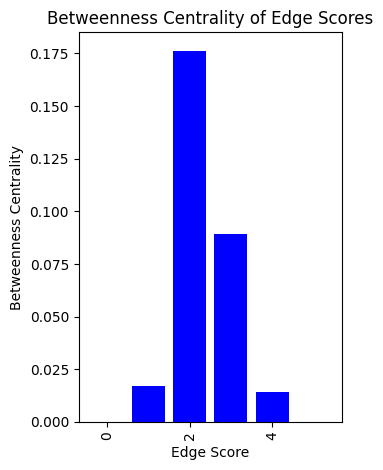

In [35]:
# Calculating betweenness centrality for all nodes
betweenness = nx.betweenness_centrality(B)

# Extracting betweenness centrality for edge scores separately
edge_score_betweenness = {node: centrality for node, centrality in betweenness.items() if node in edge_scores}
print(edge_score_betweenness)


plt.subplot(1, 2, 2)
plt.bar(edge_score_betweenness.keys(), edge_score_betweenness.values(), color='blue')
plt.title('Betweenness Centrality of Edge Scores')
plt.xlabel('Edge Score')
plt.ylabel('Betweenness Centrality')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()
